In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
titanic = pd.read_csv('data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
asd = list(titanic.columns)
asd.remove('Survived')
len(asd)

11

In [5]:
X_list = list(titanic.columns)
X_list.remove('Survived')
X = titanic[X_list]
y = titanic['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=7)

In [7]:
X_train.shape

(668, 11)

In [8]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,668.000000,668.000000,534.000000,668.000000,668.000000,668.000000
mean,436.592814,2.296407,29.472378,0.537425,0.387725,33.391840
std,256.495378,0.835235,14.368604,1.104756,0.805323,53.409639
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,213.750000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,424.000000,3.000000,28.000000,0.000000,0.000000,14.458300
75%,663.250000,3.000000,38.000000,1.000000,0.000000,31.387500
max,888.000000,3.000000,71.000000,8.000000,6.000000,512.329200


In [9]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 709 to 175
Data columns (total 11 columns):
PassengerId    668 non-null int64
Pclass         668 non-null int64
Name           668 non-null object
Sex            668 non-null object
Age            534 non-null float64
SibSp          668 non-null int64
Parch          668 non-null int64
Ticket         668 non-null object
Fare           668 non-null float64
Cabin          158 non-null object
Embarked       668 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 62.6+ KB


In [10]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            134
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          510
Embarked         0
dtype: int64

In [11]:
X_train['Cabin'].fillna('No Cabin', inplace=True)

/home/vector/.local/lib/python3.6/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [12]:
X_train.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            134
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         0
dtype: int64

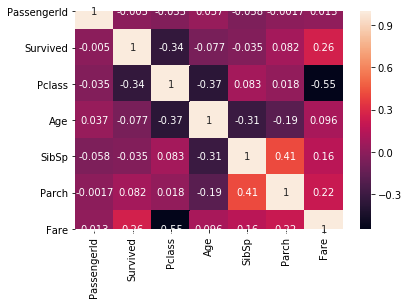

In [13]:
sns.heatmap(titanic.corr(), annot=True)

In [14]:
pearsonr(titanic.Fare, titanic.Survived)

(0.25730652238496243, 6.120189341917992e-15)